In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import math

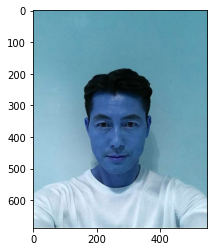

In [2]:
#이미지 불러와서 출력용 이미지 따로 보관후 출력
img_bgr = cv2.imread('LJ.jpg')
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

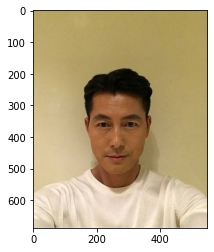

In [3]:
#openCV특성상 BGR to RGB 해줘야함
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
#디텍터 선언, 기본얼굴 감지기 binding
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(142, 291) (365, 514)]]


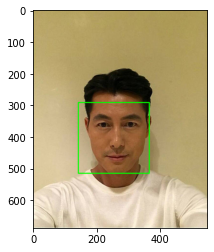

In [5]:
#찾은 얼굴을 화면에 출력
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 
# 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


In [6]:
# !를 이용해 bash 명령어 주피터에서 실행
#! wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
#! mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
#! cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [7]:
model_path = 'shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾음
# face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


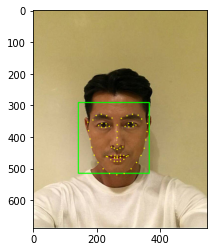

In [9]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코끝의 index는 33
    x = landmark[33][0] # 이미지에서 코끝 부위의 x값
    y = landmark[33][1] # 이미지에서 코끝 부위의 y값
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(264, 439)
(x,y) : (264,439)
(w,h) : (224,224)


In [11]:
sticker_path = 'whiskers.png' # 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수 // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 이미지의 차원 확인

(224, 224, 3)


In [12]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
refined_x = x - w//2
refined_y = y - h//2
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정.이미지 시작점은 top-left 좌표이기 때문
# 이말은 refined_x, refined_y값에서 이미지가 시작된다는거
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남

(x,y) : (152,327)


In [13]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker>127,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)#addweight이용해서 수염 투명하게 함  
#스티커값이 흰색(255)이면 앞에 스티커에리어(이미지)로 교체하고 아니면 뒤에 스티커로 출력

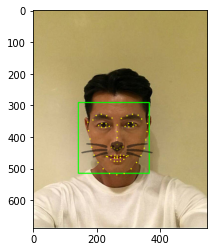

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

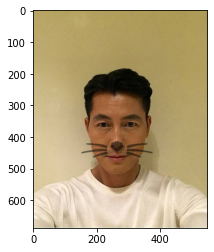

In [15]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 rgb로만 적용해놓은 원본 이미지 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker>127,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 스티커를 덮어 씌운 이미지가 나옴
plt.show()


1. 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
- 스티커를 각도에 따라 조정 필수(27, 57번의 랜드마크를 기준점으로 설정해서 각도 측정후 스티커 각도 조정 함수 작성했으나 날라감.... 참고로 미간인 36번과 45번의 사이는 detecting이 너무 안좋아서 하다가 버렸음)
2. 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
- 얼굴이 너무 작으면 얼굴 자체 인식이 안될 수도 있고 너무 크면 얼굴을 못찾거나 이상하게 찾을수도 있어서 크기에따라 얼굴을 줄이거나 키우거나 해야함
3. 실행 속도가 중요할까요?
- 당연히 실행속도는 중요할수 밖에 없음. 사진 한장이라 지금 덜 걸리지만 동영상 같은경우 여러장의 프레임을 나눠서 detecting 해야하는데 속도가 느리면 생산성이 너무 떨어짐
4. 스티커앱을 만들 때 정확도가 얼마나 중요할까요?
- product마다 중요도는 다르겠지만 기본적으로 정확도가 낮다는건 product의 가치를 버리는 꼴이기 때문에 아주 중요함 